In [1]:
# Install the Prophet
!pip install prophet

In [2]:
# Import the required libraries and dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from prophet import Prophet

In [3]:
import warnings
# Ignore warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [4]:
# Set crypto variable
crypto = 'WIF'

# Create crypto df
crypto_df = f'{crypto}_df'.lower()

In [5]:
# Store the crypto data in a Pandas DataFrame
# Set the "Date" column as the Datetime Index.
crypto_df = pd.read_csv(
    f'~/crypto-forecast/Resources/{crypto}-USD.csv',
    index_col='Date',
    parse_dates=True
).dropna()

# Sort by ascending date
crypto_df = crypto_df.sort_values(by="Date", ascending=True)

# Review the first and last five rows of the DataFrame
display(crypto_df.head())
display(crypto_df.tail())

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-04,0.000656,0.000656,0.000287,0.000317,0.000317,39461136
2023-05-05,0.000317,0.001399,0.000225,0.001266,0.001266,101798162
2023-05-06,0.001269,0.003049,0.001269,0.002314,0.002314,266556227
2023-05-07,0.002304,0.002360,0.001286,0.001299,0.001299,132793196
2023-05-08,0.001299,0.001508,0.000518,0.001117,0.001117,132340372


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-24,0.002718,0.004515,0.002637,0.004452,0.004452,237098633
2024-05-25,0.004453,0.004945,0.003546,0.003966,0.003966,247654099
2024-05-26,0.003966,0.005373,0.003862,0.004858,0.004858,178086915
2024-05-27,0.004858,0.007833,0.004823,0.007809,0.007809,392878415
2024-05-28,0.007875,0.009667,0.007640,0.009487,0.009487,524081504


In [6]:
# Get last closing price
last_close_df = crypto_df.iloc[-1]
last_close_price = last_close_df['Close']
last_close_price

0.009487

In [7]:
crypto_df.corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.978502,0.990188,0.967824,0.967824,0.888135
High,0.978502,1.000000,0.980430,0.993905,0.993905,0.942450
Low,0.990188,0.980430,1.000000,0.981867,0.981867,0.882157
Close,0.967824,0.993905,0.981867,1.000000,1.000000,0.929370
Adj Close,0.967824,0.993905,0.981867,1.000000,1.000000,0.929370
Volume,0.888135,0.942450,0.882157,0.929370,0.929370,1.000000


In [8]:
# Create new df with just Close prices and Volume
df_close = crypto_df[['Close', 'Volume']]

In [9]:
df_close.name = 'Close'
df_close

,Close,Volume
Date,,
2023-05-04,0.000317,39461136
2023-05-05,0.001266,101798162
2023-05-06,0.002314,266556227
2023-05-07,0.001299,132793196
2023-05-08,0.001117,132340372
...,...,...
2024-05-24,0.004452,237098633
2024-05-25,0.003966,247654099
2024-05-26,0.004858,178086915


In [10]:
# Create a copy of the DataFrame to avoid the SettingWithCopyWarning
df_close_ma = df_close.copy()

# Calculate 10-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA10'] = df_close_ma['Close'].rolling(10).mean()

# Calculate 30-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA30'] = df_close_ma['Close'].rolling(30).mean()

# Calculate 50-day Simple Moving Average (SMA)
df_close_ma.loc[:, 'SMA50'] = df_close_ma['Close'].rolling(50).mean()

# Remove NULL values
df_close_ma.dropna(inplace=True)

In [11]:
# Review the first and last five rows of the DataFrame
display(df_close_ma.head())
display(df_close_ma.tail())

,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2023-06-22,0.000192,7176545,0.000165,0.000199,0.000459
2023-06-23,0.000221,9860876,0.000177,0.000194,0.000457
2023-06-24,0.000243,11719184,0.000188,0.000190,0.000436
2023-06-25,0.000202,6479279,0.000192,0.000183,0.000394
2023-06-26,0.000195,4368512,0.000195,0.000178,0.000372


,Close,Volume,SMA10,SMA30,SMA50
Date,,,,,
2024-05-24,0.004452,237098633,0.001798,0.001095,0.000921
2024-05-25,0.003966,247654099,0.002086,0.001207,0.000987
2024-05-26,0.004858,178086915,0.002459,0.001350,0.001070
2024-05-27,0.007809,392878415,0.003102,0.001590,0.001212
2024-05-28,0.009487,524081504,0.003920,0.001887,0.001384


<Axes: xlabel='Date'>

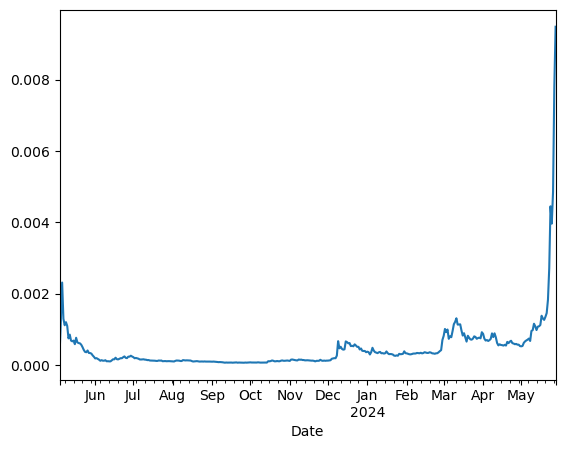

In [12]:
# Plot Close
df_close['Close'].plot()

In [13]:
## Create a Time Series Model with Prophet

In [14]:
# Using the DataFrame, reset the index so the date information is no longer the index
df_close = df_close.reset_index()

In [15]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df_close.rename(columns={'Date':'ds','Close':'y'}, inplace=True)

# Drop an NaN values from the prophet_df DataFrame
df_close.dropna()

# View the first and last five rows of the DataFrame
df_close

,ds,y,Volume
0,2023-05-04,0.000317,39461136
1,2023-05-05,0.001266,101798162
2,2023-05-06,0.002314,266556227
3,2023-05-07,0.001299,132793196
4,2023-05-08,0.001117,132340372
...,...,...,...
386,2024-05-24,0.004452,237098633
387,2024-05-25,0.003966,247654099
388,2024-05-26,0.004858,178086915
389,2024-05-27,0.007809,392878415


In [16]:
# Call the Prophet function, store as an object
crypto_model = Prophet()

In [17]:
# Fit the time-series model.
crypto_model.fit(df_close)

07:09:36 - cmdstanpy - INFO - Chain [1] start processing
07:09:36 - cmdstanpy - INFO - Chain [1] done processing


In [18]:
# Create a future dataframe to hold predictions
# Make the prediction go out 30 days
crypto_future = crypto_model.make_future_dataframe(periods = 90, freq = 'd')

# View the last five rows of the DataFrame
crypto_future.tail(5)

,ds
476,2024-08-22
477,2024-08-23
478,2024-08-24
479,2024-08-25
480,2024-08-26


In [19]:
# Make the predictions for the data using the DataFrame
crypto_forecast = crypto_model.predict(crypto_future)

# Display the first five rows of the DataFrame
crypto_forecast.tail(30)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
451,2024-07-28,0.002789,0.001969,0.003594,0.002702,0.002879,1.731763e-06,1.731763e-06,1.731763e-06,1.731763e-06,1.731763e-06,1.731763e-06,0.0,0.0,0.0,0.002791
452,2024-07-29,0.002805,0.002047,0.003631,0.002714,0.002897,5.107353e-05,5.107353e-05,5.107353e-05,5.107353e-05,5.107353e-05,5.107353e-05,0.0,0.0,0.0,0.002856
453,2024-07-30,0.002820,0.002022,0.003609,0.002726,0.002916,6.296168e-05,6.296168e-05,6.296168e-05,6.296168e-05,6.296168e-05,6.296168e-05,0.0,0.0,0.0,0.002883
454,2024-07-31,0.002836,0.001956,0.003541,0.002739,0.002934,-6.962904e-05,-6.962904e-05,-6.962904e-05,-6.962904e-05,-6.962904e-05,-6.962904e-05,0.0,0.0,0.0,0.002766
455,2024-08-01,0.002852,0.002000,0.003546,0.002753,0.002952,-5.998554e-05,-5.998554e-05,-5.998554e-05,-5.998554e-05,-5.998554e-05,-5.998554e-05,0.0,0.0,0.0,0.002792
456,2024-08-02,0.002867,0.002073,0.003668,0.002767,0.002968,-5.032831e-07,-5.032831e-07,-5.032831e-07,-5.032831e-07,-5.032831e-07,-5.032831e-07,0.0,0.0,0.0,0.002867
457,2024-08-03,0.002883,0.002148,0.003717,0.002781,0.002986,1.435089e-05,1.435089e-05,1.435089e-05,1.435089e-05,1.435089e-05,1.435089e-05,0.0,0.0,0.0,0.002897
458,2024-08-04,0.002898,0.002116,0.003645,0.002795,0.003005,1.731763e-06,1.731763e-06,1.731763e-06,1.731763e-06,1.731763e-06,1.731763e-06,0.0,0.0,0.0,0.002900
459,2024-08-05,0.002914,0.002192,0.003818,0.002808,0.003022,5.107353e-05,5.107353e-05,5.107353e-05,5.107353e-05,5.107353e-05,5.107353e-05,0.0,0.0,0.0,0.002965
460,2024-08-06,0.002929,0.002225,0.003793,0.002821,0.003040,6.296168e-05,6.296168e-05,6.296168e-05,6.296168e-05,6.296168e-05,6.296168e-05,0.0,0.0,0.0,0.002992


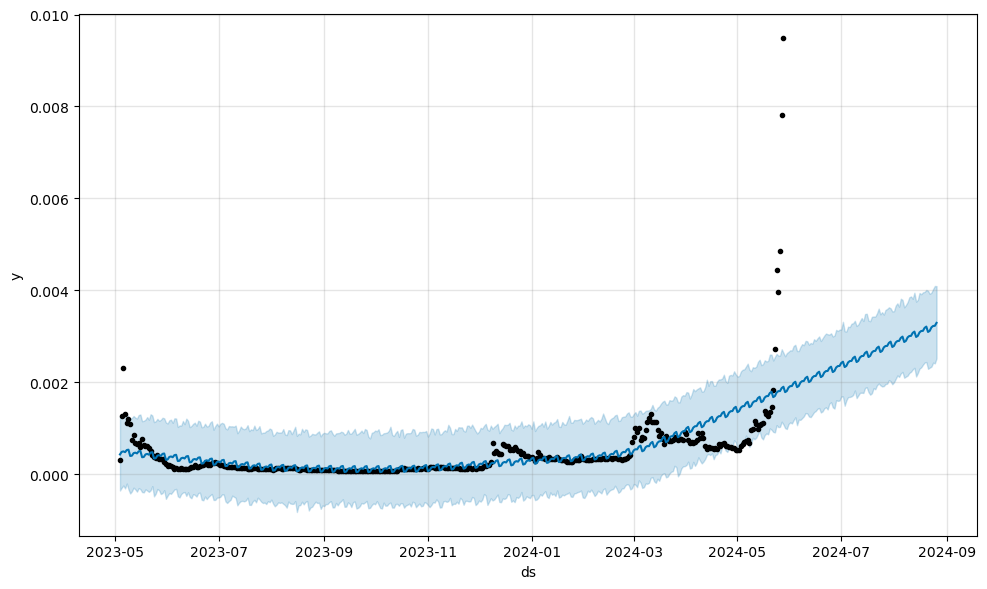

In [20]:
# Plot the Prophet predictions for the data
fig_forecast = crypto_model.plot(crypto_forecast)

In [21]:
# Set the index in the forecast DataFrame to the ds datetime column
crypto_forecast = crypto_forecast.set_index('ds')

In [22]:
# View only the yhat,yhat_lower and yhat_upper columns from the forecast DataFrame
crypto_forecast[['yhat', 'yhat_lower', 'yhat_upper']].iloc[-90:,:]

,yhat,yhat_lower,yhat_upper
ds,,,
2024-05-29,0.001785,0.001002,0.002565
2024-05-30,0.001810,0.000983,0.002634
2024-05-31,0.001885,0.001090,0.002662
2024-06-01,0.001915,0.001126,0.002695
2024-06-02,0.001918,0.001104,0.002692
...,...,...,...
2024-08-22,0.003119,0.002318,0.003923
2024-08-23,0.003194,0.002339,0.003949
2024-08-24,0.003224,0.002427,0.004028


In [23]:
# Rename columns
crypto_forecast.rename(columns={'yhat':'mid trend price','yhat_lower':'lower trend price','yhat_upper':'upper trend price'}, inplace=True)

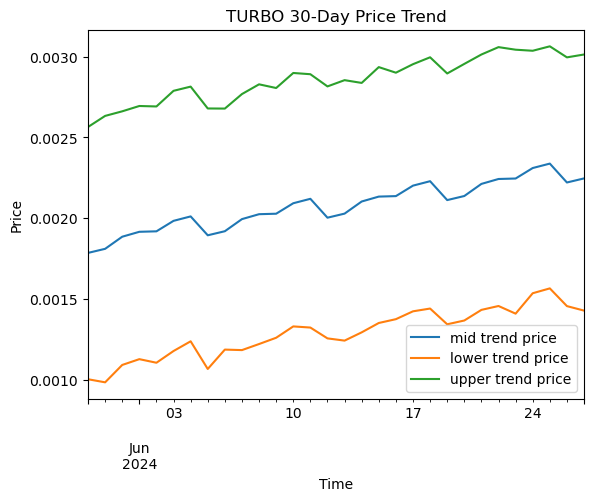

In [24]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-60,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 30-Day Price Trend')    
plt.show()

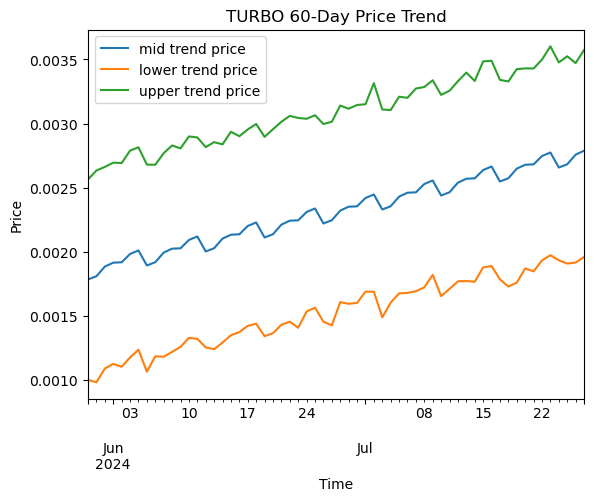

In [25]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:-30,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 60-Day Price Trend')    
plt.show()

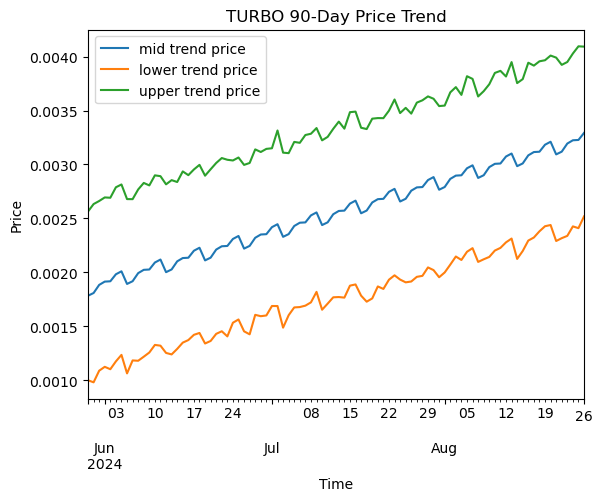

In [26]:
# From the forecast DataFrame, plot the data to visualize
# the yhat, yhat_lower, and yhat_upper columns over the last 30 days
crypto_forecast[['mid trend price', 'lower trend price', 'upper trend price']].iloc[-90:,:].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} 90-Day Price Trend')    
plt.savefig(f'{crypto}_90d_trend_forecast', bbox_inches = 'tight')
plt.show()

In [27]:
# Retrieve last closing price
last_close_price

0.009487

In [28]:
# Retreive tomorrow's mid trend price forecast
tommorow_mid_trend_price = crypto_forecast['mid trend price'].iloc[-90]
tommorow_mid_trend_price

0.0017846251939808847

In [29]:
# Calculate tommorrow's weighted price
wp = last_close_price*.5 + tommorow_mid_trend_price*.5
wp

0.005635812596990443

In [30]:
# Retreive tomorrow's weighted trend price forecast
tommorow_mid_trend_price = ((crypto_forecast['mid trend price'].iloc[-90]*.6)+(crypto_forecast['upper trend price'].iloc[-90]*.2)+(crypto_forecast['lower trend price'].iloc[-90]*.2))
tommorow_mid_trend_price

0.0017840856515868749

In [31]:
# Retrieve weighted trend price in 30 days
mid_trend_price_in_30 = ((crypto_forecast['mid trend price'].iloc[-60]*.6)+(crypto_forecast['upper trend price'].iloc[-60]*.2)+(crypto_forecast['lower trend price'].iloc[-60]*.2))
mid_trend_price_in_30

0.00234223312269963

In [32]:
# Retrieve weighted trend price in 60 days
mid_trend_price_in_60 = ((crypto_forecast['mid trend price'].iloc[-30]*.6)+(crypto_forecast['upper trend price'].iloc[-30]*.2)+(crypto_forecast['lower trend price'].iloc[-30]*.2))
mid_trend_price_in_60

0.002787198923761186

In [33]:
# Retrieve weighted trend price in 90 days
mid_trend_price_in_90 = ((crypto_forecast['mid trend price'].iloc[-1]*.6)+(crypto_forecast['upper trend price'].iloc[-1]*.2)+(crypto_forecast['lower trend price'].iloc[-1]*.2))
mid_trend_price_in_90

0.003297520016483103

In [34]:
# Calculate expected gain/loss between mid trend price in 30 days and last close price
#percent_diff_30 = ((mid_trend_price_in_30)/(last_close_price))-1
percent_diff_30 = ((mid_trend_price_in_30)/(wp))-1
percent_diff_30.round(3)

-0.584

In [35]:
# Calculate expected gain/loss between mid trend price in 60 days and last close price
#percent_diff_60 = ((mid_trend_price_in_60)/(last_close_price))-1
percent_diff_60 = ((mid_trend_price_in_60)/(wp))-1
percent_diff_60.round(3)

-0.505

In [36]:
# Calculate expected gain/loss between mid trend price in 90 days and last close price
#percent_diff_90 = ((mid_trend_price_in_90)/(last_close_price))-1
percent_diff_90 = ((mid_trend_price_in_90)/(wp))-1
percent_diff_90.round(3)

-0.415

In [37]:
# Reset the index in the forecast DataFrame
crypto_forecast = crypto_forecast.reset_index()

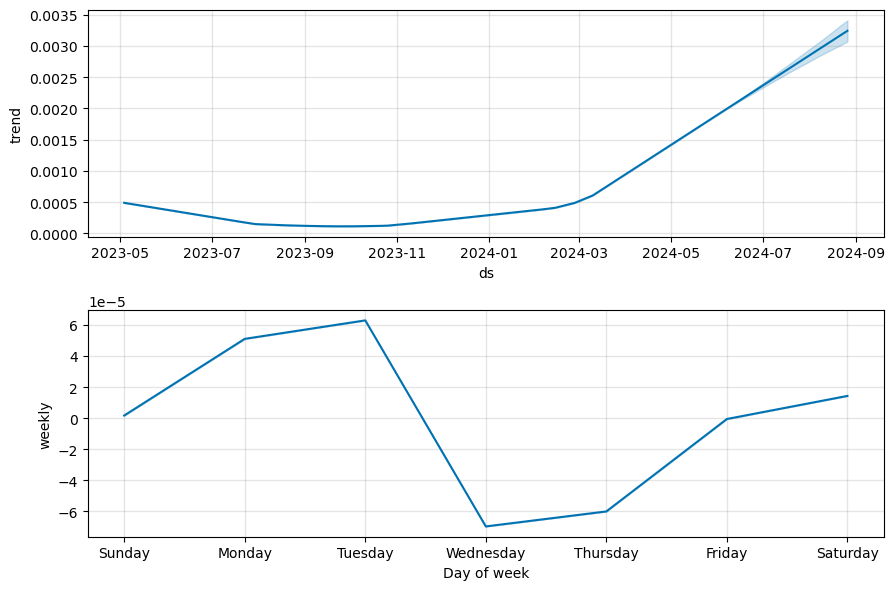

In [38]:
# Use the plot_components function to visualize the forecast results
# for the forecast DataFrame
fig_comp = crypto_model.plot_components(crypto_forecast)
plt.savefig(f'{crypto}_components.png', bbox_inches = 'tight')

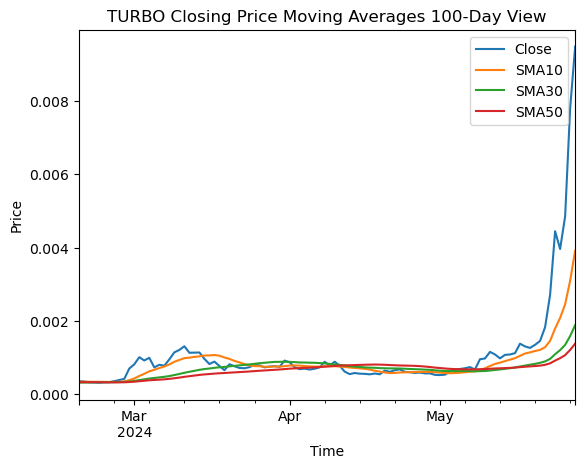

In [39]:
df_last_100 = df_close_ma.iloc[-100:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 100-Day View')    
plt.show()

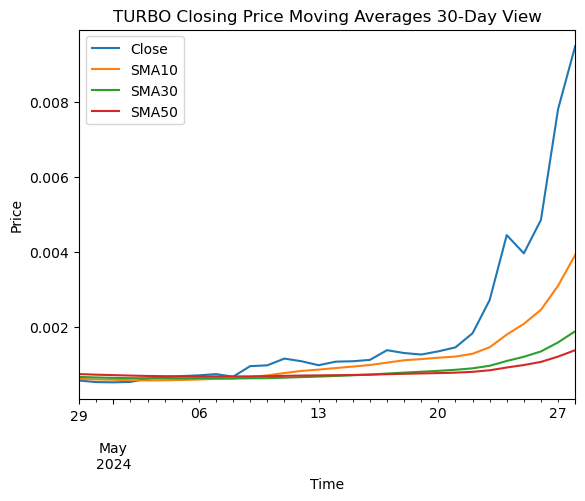

In [40]:
df_last_100 = df_close_ma.iloc[-30:]
df_last_100[['Close', 'SMA10', 'SMA30', 'SMA50']].plot()
plt.xlabel('Time')
plt.ylabel('Price')
plt.title(f'{crypto} Closing Price Moving Averages 30-Day View')    
plt.savefig(f'{crypto}_30d_MA_view.png', bbox_inches = 'tight')
plt.show()

In [41]:
# import module
from datetime import datetime
 
# get current date and time
current_datetime = datetime.now().strftime("%Y-%m-%d")
print("Current date & time : ", current_datetime)
 
# convert datetime obj to string
str_current_datetime = str(current_datetime)
 
# create a file object along with extension
#file_name = f'{crypto} '+str_current_datetime+".txt"
file_name = str_current_datetime+".csv"
file = open(file_name, 'a')
 
print("File created : ", file.name)
file.close()

Current date & time :  2024-05-28
File created :  2024-05-28.csv


In [42]:
f = open(f'{file_name}', "a")
f.writelines([f'{crypto},{last_close_price},{percent_diff_30},{percent_diff_60},{percent_diff_90}\n'])
f.close()

In [43]:
f = open(f'{file_name}', "r")
print(f.read())

ADA,0.467963,-0.1052602170121748,-0.12273644664765881,0.3290357889210098
BNB,603.53,-0.25056810429065257,-0.2215079974153341,-0.1649224745592407
BONK,3.9e-05,-0.014494740982285093,0.08442648038590761,0.19120720545038306
BTC,69394.55,-0.13104895913159076,-0.09610781497169618,-0.06658554976538122
DOGE,0.16909,-0.2526838861594948,-0.261719021763019,-0.11168757103535032
ETH,3892.01,-0.1645243603238974,-0.11468492873869685,-0.05655914807305851
PEPE,1.7e-05,-0.012835813201128365,0.15683273575473033,0.33665397482211445
SHIB,2.6e-05,-0.09625161149572303,-0.06580297388088108,-0.019378807390401542
SOL,170.0,0.0697805910206053,0.14254685223683405,0.23609472681976418
XRP,0.533772,-0.07405203806678096,0.0030706211259972083,0.10932106565779831
TURBO,0.009487,-0.5844018795177122,-0.5054486152982506,-0.4148989236718059

